<a href="https://colab.research.google.com/github/TarunNehla/Customer-churn-prediction/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group 13
# Bank Customer Churn Predicton

Tarun_211000059_CSE

Vipul_Guru_211000061_CSE

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Churn_Modelling.csv", index_col=0)
df.drop('CustomerId',axis = 1,inplace = True)
df.head()

# df.iloc[[10,11]]

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


CustomerID': The unique identifier for each customer.

'Surname': The customer's surname.

'CreditScore': The customer's credit score.

'Geography': The customer's country of origin.

'Gender': The customer's gender (Male or Female).

'Age': The customer's age.

'Tenure': The number of years the customer has been with the bank.

'Balance': The customer's account balance.

'NumOfProducts': The number of bank products the customer has.

'HasCrCard': Whether the customer has a credit card or not (1 = Yes, 0 = No).

'IsActiveMember': Whether the customer is an active member or not (1 = Yes, 0 = No).

'EstimatedSalary': The estimated salary of the customer.

'Exited': Whether the customer has left the bank or not (1 = Yes, 0 = No).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [ ]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df = df.fillna(df.mean())

<ipython-input-199-04e87d67d337>:1: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



# DATA Cleaning

In [ ]:


# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert columns to appropriate data types
df['CreditScore'] = df['CreditScore'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Tenure'] = df['Tenure'].astype(int)
df['Balance'] = df['Balance'].astype(float)
df['NumOfProducts'] = df['NumOfProducts'].astype(int)
df['HasCrCard'] = df['HasCrCard'].astype(int)
df['IsActiveMember'] = df['IsActiveMember'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(float)

# Check for and remove any outliers
df = df[(np.abs(df['CreditScore'] - df['CreditScore'].mean()) / df['CreditScore'].std()) <= 3]
df = df[(np.abs(df['Age'] - df['Age'].mean()) / df['Age'].std()) <= 3]
df = df[(np.abs(df['Tenure'] - df['Tenure'].mean()) / df['Tenure'].std()) <= 3]
df = df[(np.abs(df['Balance'] - df['Balance'].mean()) / df['Balance'].std()) <= 3]
df = df[(np.abs(df['NumOfProducts'] - df['NumOfProducts'].mean()) / df['NumOfProducts'].std()) <= 3]
df = df[(np.abs(df['EstimatedSalary'] - df['EstimatedSalary'].mean()) / df['EstimatedSalary'].std()) <= 3]


# Check for and remove any invalid values
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
df = df[(df['Balance'] >= 0)]
df.dropna(inplace=True)
# Reset the index
df.reset_index(drop=True, inplace=True)

# Save the cleaned data to a new file
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000,9799.000000
mean,650.586693,38.384427,5.011532,76472.676347,1.515461,0.705378,0.510052,100029.359750,0.199816
std,96.341265,9.663426,2.890915,62407.290305,0.550882,0.455896,0.499924,57495.943704,0.399883
min,363.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50992.930000,0.000000
50%,652.000000,37.000000,5.000000,97133.920000,1.000000,1.000000,1.000000,100060.540000,0.000000
75%,718.000000,43.000000,7.000000,127638.135000,2.000000,1.000000,1.000000,149382.875000,0.000000
max,850.000000,70.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000


<ipython-input-202-b7ffa3f30df0>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

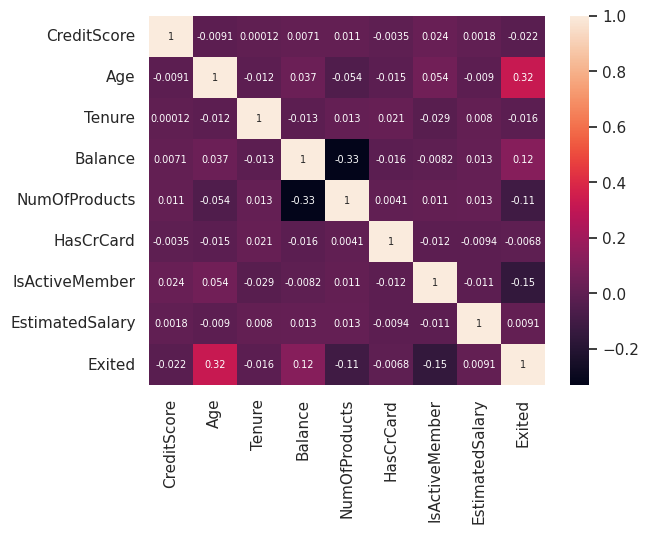

In [ ]:
sns.set(font_scale=1.0)
sns.heatmap(df.corr(), annot =True, annot_kws={'size': 7})
# Create pair plot

**Data Visualization**

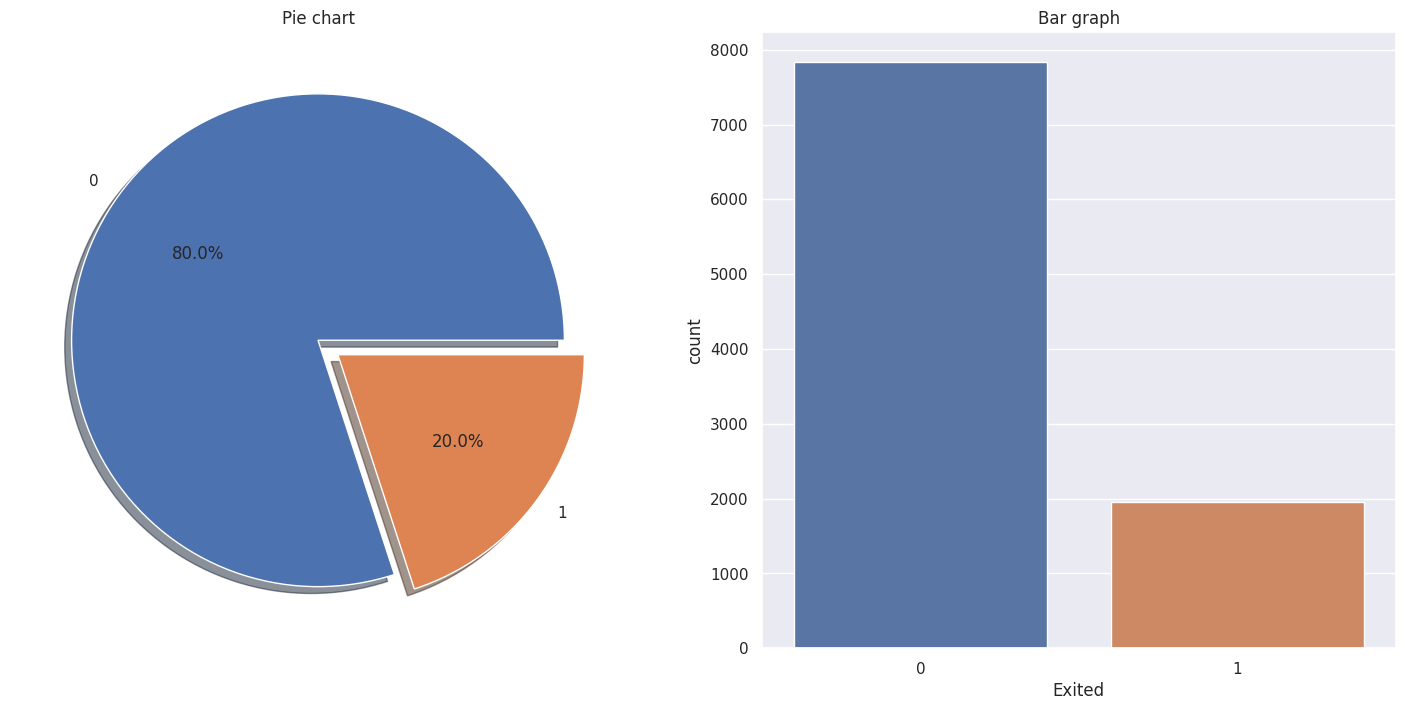

In [ ]:
# The distribution of the dependent variable in the dataset is plotted as pie and columns graphs.
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie chart')
ax[0].set_ylabel('')
sns.countplot(x='Exited', data=df, ax=ax[1])
ax[1].set_title('Bar graph')
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

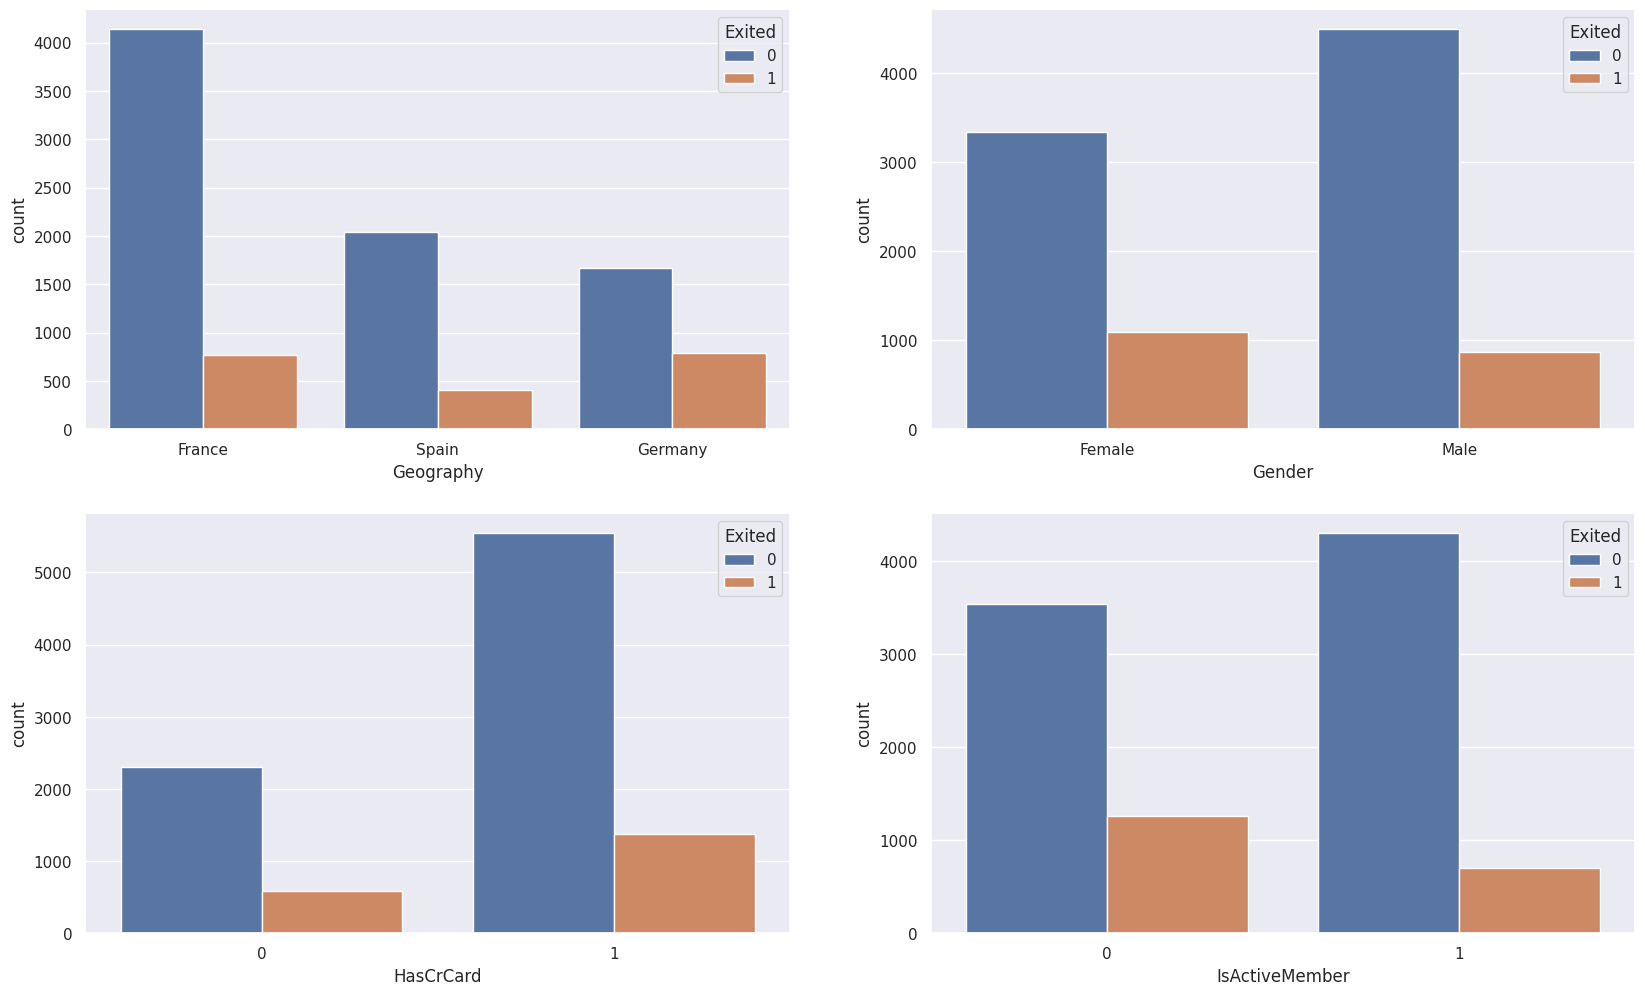

In [ ]:
# Plotted the categorical variables on the basis of the graph of the column according to the dependent variable.
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

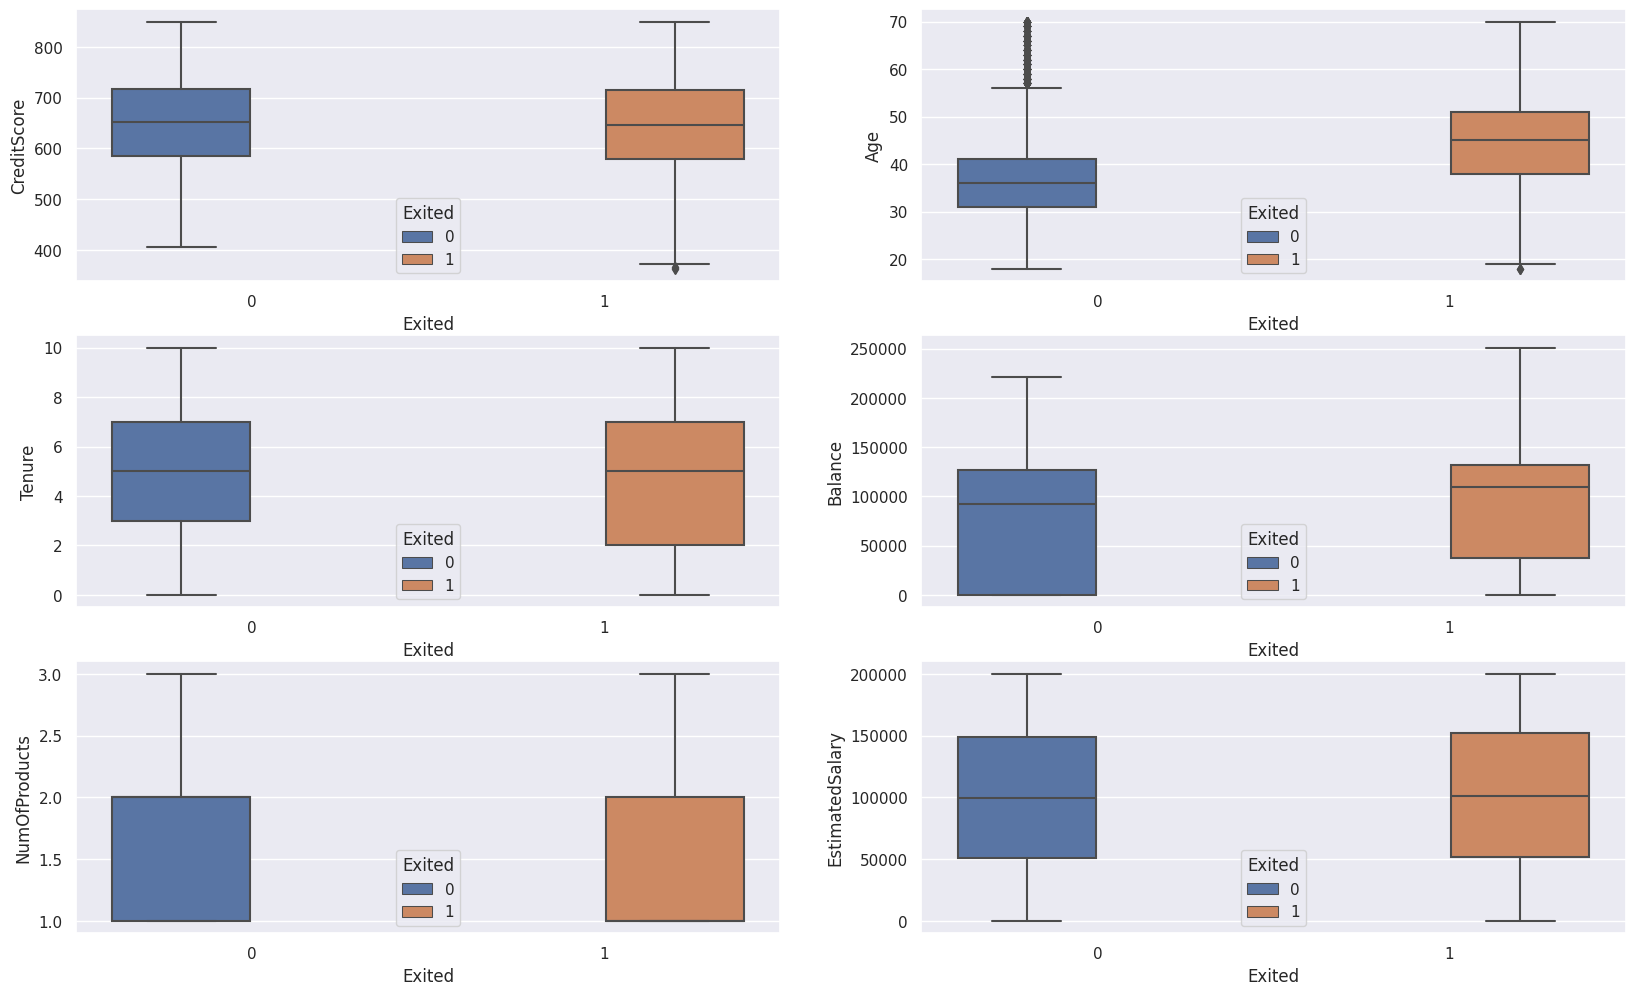

In [ ]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=df, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df , ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=axarr[2][1])
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data into features and target
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df['Exited']

# Apply SMOTE to balance the data
x_resampled, y_resampled = SMOTE().fit_resample(x, y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.20, random_state=20)


# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)


(12545, 8)
(3137, 8)
(3137,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

import itertools

In [ ]:
param_grid = {'n_neighbors': np.arange(1, 11)}

# Perform a grid search to find the optimal value for n_neighbors
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best parameter and its score
parameter = grid_search.best_params_
print('Best parameter:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameter: {'n_neighbors': 7}
Best score: 0.8015145476285372


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

# Make predictions on the test set
x = df.iloc[10] ;
y_pred = knn.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion matrix:')
print(confusion_mat)


Accuracy: 0.7975773031558814
Precision: 0.7765830346475507
Recall: 0.8327994875080077
F1 Score: 0.8037094281298299
Confusion matrix:
[[1202  374]
 [ 261 1300]]


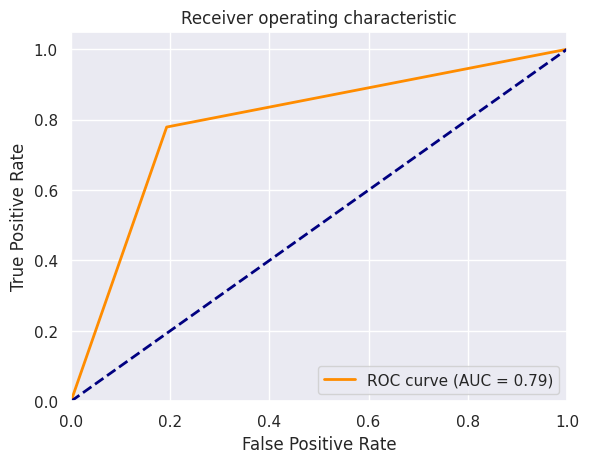

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# assuming you have y_test (true labels) and y_score (predicted scores) variables

# calculate fpr, tpr and threshold values for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(x_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion matrix:')
print(confusion_mat)


Accuracy: 0.7510360216767612
Precision: 0.7404438964241677
Recall: 0.769378603459321
F1 Score: 0.7546339930882815
Confusion matrix:
[[1155  421]
 [ 360 1201]]


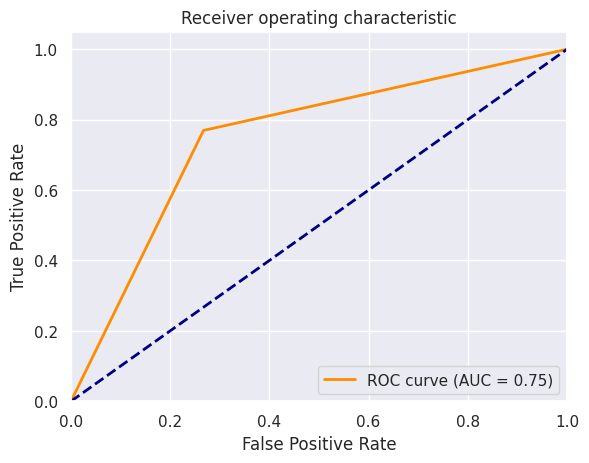

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# assuming you have y_test (true labels) and y_score (predicted scores) variables

# calculate fpr, tpr and threshold values for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
